In [13]:
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt

In [14]:
def get_date_from_filename(filename):
    datestring = filename[2:10]
    date = dt.strptime(datestring, '%Y%m%d')
    
    return date

In [15]:
# Load all the snowdepth rasters and stack them into an ndarray

# Specify the folder that has our ASO snow depth rasters
folder = r'C:/Users/steve/git/whw2019_snowmelt/data/aso_masked/2016/'

date = []
snowdepth = np.zeros((1684,1777))

# Loop through here and find each .tif, then apply the mask and write a new .tif file
for _,_,filenames in os.walk(folder):
    for file in filenames:
        fileExt=os.path.splitext(file)[-1]
        if fileExt == '.tif':
            with rio.open(folder+file,'r') as src:
                date.append(get_date_from_filename(file))
                snowdepth = np.dstack((snowdepth,src.read(1)))

# Remove the "np.zeros" array which is in the 0th position
snowdepth = snowdepth[:,:,1:]  

# Sort the data in chronological order
date_idx = date.argsort()
date = date[date_idx[::1]]
snowdepth = snowdepth[:,:,date_idx[::1]]

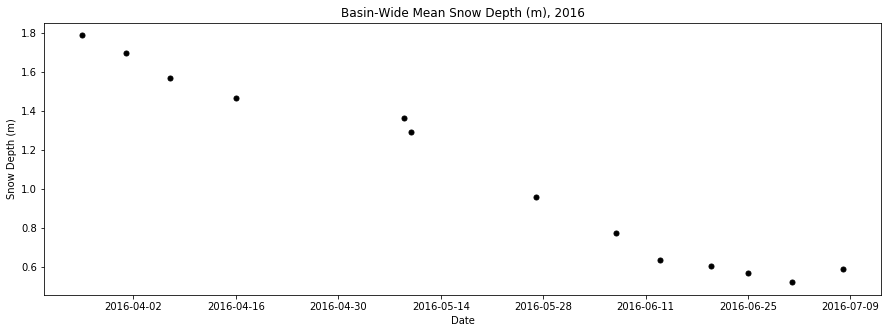

In [32]:
plt.figure(figsize=(15,5))
plt.plot(date,np.nanmean(snowdepth,axis=(0,1)),'.k',markersize=10)
plt.ylabel('Snow Depth (m)')
plt.xlabel('Date')
plt.title('Basin-Wide Mean Snow Depth (m), 2016');

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


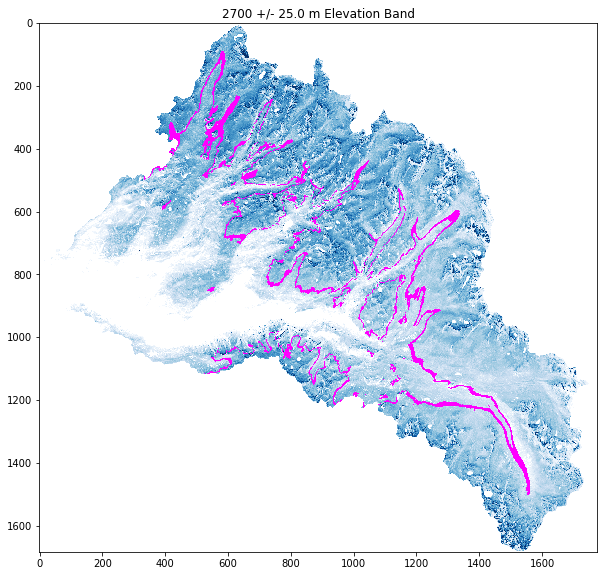

In [77]:
def draw_elev_band(elev,elev_band,band_width):
    '''Create an array to visualize a single elevation band within a DEM'''
    # Make a nan array of the same shape
    elev_band_array = np.full([elev.shape[0], elev.shape[1]], np.nan)

    # Find upper and lower value of the elevation band we want
    half_width = band_width / 2
    lower = elev_band - half_width
    upper = elev_band + half_width

    # Find the indices in the DEM data that correspond to our elevation band
    elev_idx = np.where( (elev > lower) & (elev < upper) )

    # Wherever our elevation band criteria is met, set that value to 1 in our elevation band array
    elev_band_array[elev_idx] = 1
    
    # Return the elevation band array
    return elev_band_array




# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(r'C:/Users/steve/git/whw2019_snowmelt/data/masked_dem30m.tif')
elev = dem.read(1)

# Pick elevation band and width:
elev_band = 2700 # elevation in meters
band_width = 50 # +/- 1/2 of the width in meters

elev_band_array = draw_elev_band(elev,elev_band,band_width)

# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev_band_array,cmap='spring',zorder=1)
plt.imshow(snowdepth[:,:,0],cmap='Blues',vmin=0,vmax=5,zorder=0)
title_text = '{} +/- {} m Elevation Band'.format(elev_band,half_width)
plt.title(title_text);

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


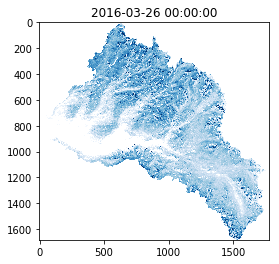

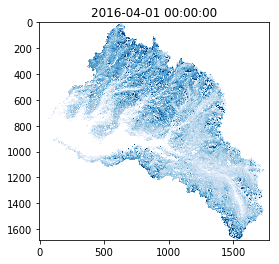

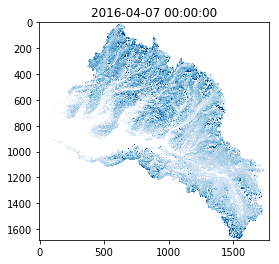

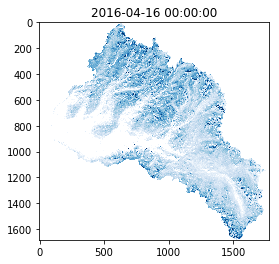

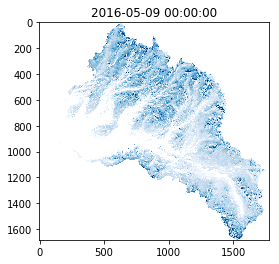

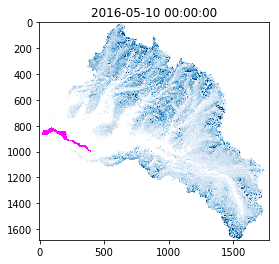

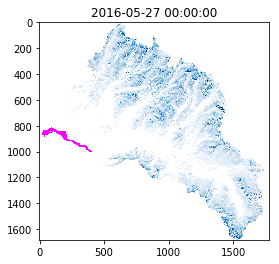

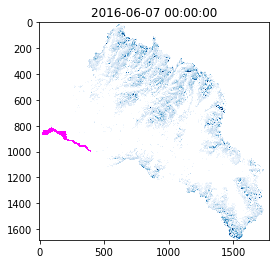

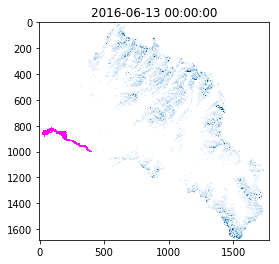

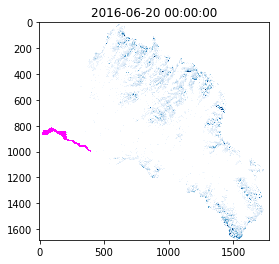

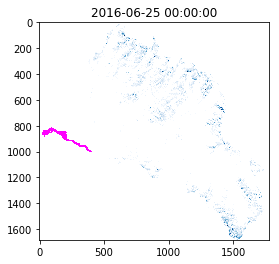

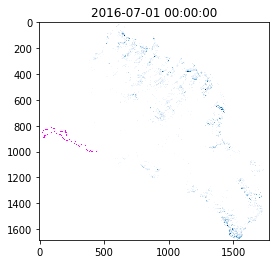

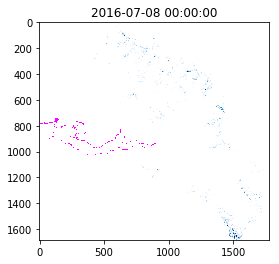

In [78]:
# Find and plot where the minimum elevation that snow is present:

for i in range(0,snowdepth.shape[2]):
    plt.figure()
    plt.imshow(snowdepth[:,:,i],cmap='Blues',vmin=0,vmax=5, zorder=0)
    plt.title(str(date[i]))
    # Find minimum elevation where we have snow:
    min_snow_elev = np.min(elev[~np.isnan(snowdepth[:,:,i])])
    # Draw a line across this elevation band:
    elev_band_array = draw_elev_band(elev,min_snow_elev,50)
    plt.imshow(elev_band_array,cmap='spring',zorder=1)